# Case study - Datacamp Professional Certificate


In this pratical exam, I must act as a Data Analyst and perform an analysis for "Pens and Printers" based on the on the email below. It is expected a Written Report and a video presentation up to 10 minutes long. 


### Business Task
<i>Hi,
Really hoping you could help me out with some analysis. This is quite short notice but I have
a meeting with the executive team to update them on sales approaches for the new
product line so I need this information as soon as possible.

We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.
We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.</i>

### About Pens and Printers
Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.
We have built long lasting relationships with our customers and they trust us to provide them
with the best products for them. As the way in which consumers buy products is changing,
our sales tactics have to change too. Launching a new product line is expensive and we need
to make sure we are using the best techniques to sell the new product effectively. The best
approach may vary for each new product so we need to learn quickly what works and what
doesn’t.

### New Product Sales Methods
Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.
Email: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.
Call: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.
Email and call: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer

Since the data is in a single .csv file, let's import it to assess the data's integrity

In [1]:
import pandas as pd 
#read the file using pandas and assign it into a variable
df = pd.read_csv("product_sales.csv", sep=",")
df.sample()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
10724,3,Email + Call,a3b30dac-122c-4900-9545-bf6ae2df6b59,10,152.62,2,25,Indiana


In [2]:
#Get the shape of the dataframe
df.shape

(15000, 8)

### **Data's integrity**

Before cleaning the data, we must assess the consistency/integrity of the data. To do so, we will check for:
1. Missing Values
2. Check for Duplicates
3. Validate Data Types 
4. Assess Data Consistency
5. Validate Referential Integrity
6. Examine Statistical Summaries
7. Check for Data Anomalies or Outliers


In [3]:
#1 Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


We can see that the "revenue" columns contain more than one thousand rows that were not populated. Since this is an important column and will not be dropped, it's important to check it more in detail to decide what to do next. 

In [4]:
revenue_missing = df['revenue'].isnull()
#Filtering the missing values from the 'revenue' column 
df_missing = df[revenue_missing]
df_missing.sample(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
7982,2,Email,f2d9cdda-c729-4750-92e3-a795ccfc99fb,10,NaN,6,27,Illinois
10209,1,Email + Call,f8ebbf5a-d93c-491a-8213-b9caa4519180,9,NaN,9,24,Ohio
11867,3,Email,195c2778-26d6-4f31-a057-15a724f36198,10,NaN,2,25,Mississippi
11753,5,Email,c842d409-7143-4b04-9daf-226d8d55c453,10,NaN,7,22,California
14527,5,Email + Call,d0f42f8b-92a4-4860-b035-e167ff9422ad,12,NaN,1,29,Maryland
8471,1,Email,4b45b7ca-96e4-4536-8746-1d5467b0bdb4,9,NaN,2,31,Missouri
5435,1,Call,deb6fd0a-afdd-4611-b4b3-71da005ec15c,7,NaN,2,17,California
6539,2,Email,eae94bc8-5b3c-46c4-80bc-d35d72671585,10,NaN,2,24,New Hampshire
10935,4,Email,87ab3372-6236-466c-bd20-4acafec5ae9b,11,NaN,1,29,Michigan
806,5,Call,76b273d4-a2e9-4f94-93c8-4cfef2d97581,11,NaN,2,21,Tennessee


Let's see if the missing values grouping by sales_method



In [5]:
#Grouping the missing values by 'sales_method' 
df_missing.groupby('sales_method').size()

sales_method
Call            181
Email           541
Email + Call    346
em + call         3
email             3
dtype: int64

In [6]:
#Let's calculate the proportion of missing values in each sales method

call_prop =  round(df_missing[df_missing['sales_method'] == 'Call'].shape[0] / df[df['sales_method'] == 'Call'].shape[0], 2)
email_prop =  round(df_missing[df_missing['sales_method'] == 'Email'].shape[0] / df[df['sales_method'] == 'Email'].shape[0],2)
email_call_prop =  round(df_missing[df_missing['sales_method'] == 'Email + Call'].shape[0] / df[df['sales_method'] == 'Email + Call'].shape[0],2)

print(f"Proportion of missing values in 'call' sales method: {call_prop}")
print(f"Proportion of missing values in 'email' sales method: {email_prop}")
print(f"Proportion of missing values in 'email + call' sales method: {email_call_prop}")

Proportion of missing values in 'call' sales method: 0.04
Proportion of missing values in 'email' sales method: 0.07
Proportion of missing values in 'email + call' sales method: 0.14


Since the proportion of missing values if not significant in each method, we can drop the rows with missing values on the 'Revenue' column 

In [7]:
#Dropping the missing values from the 'revenue' column
df_clean = df.dropna(subset=['revenue'])
#Checking again for missing values
missing_values = df_clean.isnull().sum()
print(missing_values)

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


In [8]:
#2. Check for Duplicates
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


There are no duplicates on the dataframe. However, we could see if one customer is present more than once on the 'customer_id' column.

In [9]:
#Checking for duplicates in the 'customer_id' column
duplicates_customer_id = df_clean.duplicated(subset=['customer_id']).sum()
print(f"Number of duplicates in 'customer_id' column: {duplicates_customer_id}")

Number of duplicates in 'customer_id' column: 0


There is no duplicates whatsoever on the dataframe. 

In [10]:
#3. Validate Data Types
df_clean.dtypes 


week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [11]:
df_clean.sample()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
5261,1,Email,9f13a98f-3b9a-44e0-a03a-367fed753c90,9,87.31,5,27,Arkansas


Only 'sales_method' and 'state' column should be converted into 'string' types

In [12]:
#Converting 'Sales_method' and 'state'columns from object to string data type
cols_to_convert = ['sales_method', 'state']

for col in cols_to_convert:
    df_clean[col] = df_clean[col].astype('string')  

df_clean.dtypes

<ipython-input-12-c55cd9ac09b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype('string')


week                   int64
sales_method          string
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 string
dtype: object

In [13]:
#4. Assess Data Consistency
#Checking for consistency in the 'week' column
df_clean['week'].unique()

array([6, 5, 3, 4, 1, 2], dtype=int64)

In [14]:
#'Week' column has values ranging from 1 to 6. Let's check the number of unique values in the column 'sales_method'
df_clean['sales_method'].unique()

<StringArray>
['Email + Call', 'Call', 'Email', 'em + call', 'email']
Length: 5, dtype: string

As we had already noted before, there's a problem of consistency in the 'sales_method' colum. Instead of 5 categories, we should reduce it to 3 by merging "Email + Call' and 'em + call' also 'Email' and 'email'.

In [15]:
#Fixing the data consistency issue in the 'sales_method' column by replacing 'em + call' with 'Email + Call' and also 'email' with 'Email'
df_clean['sales_method'] = df_clean['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
df_clean['sales_method'].unique()

<ipython-input-15-f51b7fca8ea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sales_method'] = df_clean['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})


array(['Email + Call', 'Call', 'Email'], dtype=object)

In [16]:
#'Sales_method' column has been fixed. Let's check the number of unique values in the 'years_as_customer' column. 
# Since Pen and Printers was founded in 1984, there shoudn't be any value less than 40. 
out_years = df_clean[df_clean['years_as_customer'] > 40]
print(out_years)

       week sales_method                           customer_id  nb_sold  \
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10   
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10   

       revenue  years_as_customer  nb_site_visits       state  
13741    97.22                 63              24  California  
13800    50.47                 47              27  California  


In [17]:
#Lets drop the two rows in the 'years_as_customer' column that have values greater than 40
df_clean = df_clean[df_clean['years_as_customer'] <= 40]
df_clean['years_as_customer'].unique()

array([ 1,  6,  0, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36,  3, 15, 14, 19,
       13, 12, 11, 30, 22, 18, 23, 32, 16, 39, 25, 33, 21, 31, 24, 27, 34,
       28, 26, 29, 35, 38, 37], dtype=int64)

In [18]:
#Let's check the number of unique values in the 'state' column
df_clean['state'].unique()

<StringArray>
[        'Kansas',      'Wisconsin',       'Illinois',    'Mississippi',
        'Georgia',       'Oklahoma',  'Massachusetts',       'Missouri',
          'Texas',       'New York',       'Maryland',     'California',
      'Tennessee',   'North Dakota',        'Florida',       'Michigan',
 'North Carolina',   'Pennsylvania',        'Indiana',         'Hawaii',
       'Colorado',      'Louisiana',       'Virginia',       'Arkansas',
         'Alaska',         'Oregon',  'New Hampshire',           'Ohio',
     'New Jersey',    'Connecticut',           'Iowa',        'Montana',
     'Washington',        'Arizona',       'Kentucky',        'Alabama',
       'Nebraska', 'South Carolina',      'Minnesota',   'South Dakota',
          'Maine',           'Utah',  'West Virginia',        'Vermont',
     'New Mexico',   'Rhode Island',         'Nevada',       'Delaware',
          'Idaho',        'Wyoming']
Length: 50, dtype: string

All 50 states from USA are included in the column 'state' with no duplicates of errors.
Since there is no Referential Integrity to assess we can pass to the next step. 

In [20]:
#6. Examine Statistical Summaries
round(df_clean.describe(), 1)

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13924.0,13924.0,13924.0,13924.0,13924.0
mean,3.1,10.0,93.9,5.0,24.9
std,1.7,1.8,47.4,5.0,3.5
min,1.0,7.0,32.5,0.0,12.0
25%,1.0,9.0,52.5,1.0,23.0
50%,3.0,10.0,89.5,3.0,25.0
75%,4.0,11.0,107.3,7.0,27.0
max,6.0,16.0,238.3,39.0,37.0


By examining the statistical summaries, we can clearly see that the mean number of new products sold is 10, which is 7 as minimum and 16 as maximum. The minimum revenue from the sales are 32.5 dollars and the maximum is 238.3 dollars, having the mean revenue of sales at 93.9 dollars. We have customers that have been buying from Pen and Printers for 5 years in average, having new customers (less than 1 year) and really old customers (buying for 39 years, almost since the beginning of Pens and Printers). We see that the standard deviation for year as customers is equal to the mean, so we conclude that most of our customers is present for the past 5 years. On average, the customers visit Pen and Printers’ website almost 25 times, being the minimum of times 12 and the maximum of visits 37. 

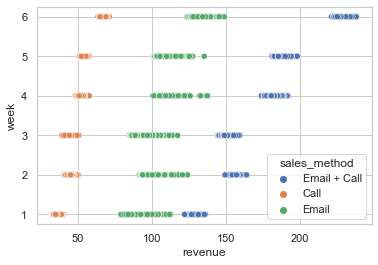

In [30]:
#7. Check for Data Anomalies or Outliers
import matplotlib.pyplot as plt
import seaborn as sns

#Checking for outliers in the 'revenue' column by ploting a scatter plot
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_clean, x="revenue", y="week", hue="sales_method", palette="deep")
plt.show()


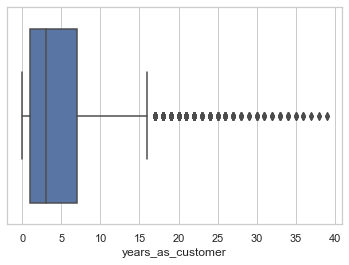

In [31]:
#Checking for outliers in the 'years_as_customer' column by ploting a boxplot
sns.boxplot(x=df_clean['years_as_customer'])
plt.show()

Concerning outliers, we already fixed the ones we found on years_as_customer column. Let’s check it on the revenue column and number of new products sold.  

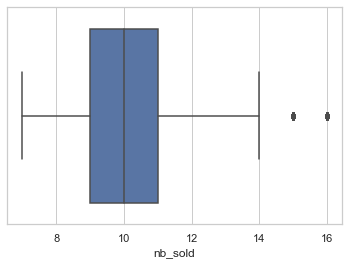

In [32]:
#Checking for outliers in the 'nb_sold' column by ploting a boxplot
sns.boxplot(x=df_clean['nb_sold'])
plt.show()

After doing that, we conclude that there were no outliers on the dataset identified so far. Let’s pass to the next step and clean the data even further. 

### **Process and cleaning**

In [34]:
df_clean.sample(15)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
559,6,Email + Call,b2f45f98-50f4-4ba3-ba61-429a56d9f0d4,15,225.64,6,29,New York
12669,2,Call,f1d2b92a-90cb-4c8c-8f77-d77647b7f19e,9,43.18,4,29,Florida
12337,1,Email,bd970710-36e5-4c1b-b6c5-8614188c734c,8,84.56,5,23,California
12324,4,Call,641a905a-0b0d-4106-a524-c8d8080757ae,10,51.79,2,22,California
5835,4,Email,a3a1eb78-5287-4b0c-be0d-b20486f5f53d,12,121.64,13,31,Louisiana
9332,3,Email,16728ac4-3612-48fa-b070-fbc53c29a905,9,88.45,0,24,Wisconsin
12478,6,Email + Call,0228e024-ae73-463f-8967-46a421655138,15,227.39,2,29,Indiana
7282,6,Email + Call,d6202d12-3668-4cb4-8f36-4703dbbef161,15,227.27,1,31,Tennessee
9600,1,Email,aba11358-8856-4d56-aaa9-5ef131e24f50,8,84.51,1,20,California
7238,4,Email,c3c8f841-5bf2-4a03-8b35-5b96e58d1e3c,11,105.06,7,22,New Jersey


In [53]:
#Create a new colum to 'df_clean' called 'revenue_per_item' which is the division of 'revenue' by  'nb_sold'
df_clean['revenue_per_item'] = round(df_clean['revenue'] / df_clean['nb_sold'],2)
df_clean.sample(10)

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state,revenue_per_item,customer_id
11215,1,Email,9,89.75,3,20,Louisiana,9.97,03dc5db5-d2b3-4fe2-9343-73cbeb2676a0
12493,5,Email + Call,13,188.35,5,29,Connecticut,14.49,7f464e12-d129-48fa-9d27-e0df87bd30a6
7962,3,Email,9,91.82,1,23,Wisconsin,10.20,3e3d3464-e7fa-42e1-8576-9e07dd2f98f5
4834,3,Email,9,87.08,6,26,Wisconsin,9.68,6f3a4fcd-11a1-47a6-9757-3c14b94684cc
14434,1,Call,7,35.92,1,23,Wisconsin,5.13,28617144-f89b-4b8b-9300-6bd038d0dec7
6414,5,Call,11,52.81,4,21,Tennessee,4.80,3f171a02-49c5-47d2-8614-99001deb7504
2529,1,Email,9,93.09,16,22,Pennsylvania,10.34,c9bf225c-e9fd-4c88-82e2-9f6a5c6c578c
1978,3,Call,9,42.59,7,20,Georgia,4.73,3f541144-0147-4311-a9f2-964ecaff76e6
2559,6,Call,13,65.74,6,28,California,5.06,5f852f8a-521d-4ecb-a490-2ae739f03588
8024,6,Email + Call,15,223.61,1,28,Pennsylvania,14.91,8b422a00-8d90-4444-9446-91bcc5dc3a24


It seems that our dataset is ready to be saved into a new .csv and be aggregated in the analyze phase.

In [57]:
df_clean.to_csv('product_sales_cleaned.csv', index=False)

## **Analyzing**

In [58]:
#Assiging the cleaned data to a new variable
df_cleaned = pd.read_csv('product_sales_cleaned.csv')
df_cleaned.sample(10)

,week,sales_method,nb_sold,revenue,years_as_customer,nb_site_visits,state,revenue_per_item,customer_id
1596,1,Email,8,82.93,18,19,Illinois,10.37,95ad5a3e-e85b-401d-937e-12d21ab90539
8910,4,Email,11,105.88,2,29,California,9.63,f1061202-cb6c-427e-ac9b-460d0740a288
4143,4,Email,11,105.51,5,22,Kansas,9.59,5973158e-9150-4e78-802a-401ecb29616c
9276,3,Email,9,89.78,4,25,New York,9.98,36d3aa4d-ebea-4b26-be8b-42454a379202
7218,2,Call,9,42.71,13,24,Illinois,4.75,54413597-4e57-48c6-985b-226fbe5ed50b
11316,4,Email,10,104.78,13,24,Virginia,10.48,43b5b91d-d1d7-4755-909f-04d75f077381
2803,2,Email,10,99.93,5,30,New York,9.99,a4028865-1b4c-4acb-b1b4-14de16a19d51
9280,4,Call,10,51.01,0,24,New York,5.10,151b642b-dd36-4fcb-9a61-567345fa4f77
6068,3,Email,10,99.93,2,20,Texas,9.99,976e7816-4349-4ddf-abdb-7a9024eecd19
1986,1,Email,9,92.29,19,25,California,10.25,d4227e4f-9a94-492e-b480-f5aff6122ece


- How many customers were there for each approach?

In [77]:
#Calculating the total number of customers in each sales method and getting the proportion of customers in each sales method compared to the total number of customers
total_customers = df_cleaned.groupby('sales_method')['customer_id'].nunique()  
total_customers = total_customers.reset_index()
total_customers['proportion'] = round(total_customers['customer_id'] / total_customers['customer_id'].sum(), 2)
#Printing the total number of customers in each sales method sorting by the 'customer_id' column in descending order
total_customers = total_customers.sort_values(by='customer_id', ascending=False)
print(total_customers)

#saving into a csv file to be used in the visualization part
total_customers.to_csv('question_1.csv', index=False)


   sales_method  customer_id  proportion
1         Email         6921        0.50
0          Call         4780        0.34
2  Email + Call         2223        0.16


To answer the first business question, we have Email as the major sales method with 6.921 customers in it, which is half of the total customers. In second place, the Call method appears with 4.780 people, representing 34%. And lastly, Email + Call method represents only 16% of all approachs with 2.223 customers. 

Let's pass to the next question: **What does the spread of the revenue look like overall? And for each method?**

In [80]:
#Calculating how the revenue spread across weeks
total_revenue = df_cleaned.groupby('week')['revenue'].sum()
total_revenue = total_revenue.reset_index()
total_revenue['proportion'] = round(total_revenue['revenue'] / total_revenue['revenue'].sum(), 2)
#Printing the total revenue in each week sorting by the 'revenue' column in descending order
total_revenue = total_revenue.sort_values(by='revenue', ascending=False)
print(total_revenue)

   week    revenue  proportion
0     1  272810.06        0.21
4     5  254701.28        0.19
3     4  235628.09        0.18
1     2  197962.60        0.15
2     3  183776.55        0.14
5     6  163111.74        0.12


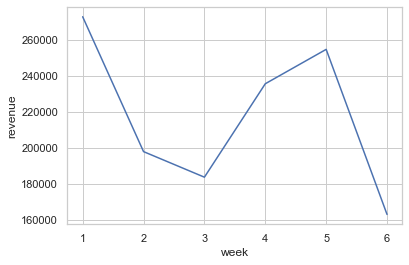

In [82]:
#Ploting the overall revenue spread across weeks using a line plot
sns.lineplot(data=total_revenue, x="week", y="revenue")
plt.show()

In [83]:
#Calculating the total revenue in each sales method and getting the proportion of revenue in each sales method compared to the total revenue
total_revenue_sales_method = df_cleaned.groupby('sales_method')['revenue'].sum()
total_revenue_sales_method = total_revenue_sales_method.reset_index()
total_revenue_sales_method['proportion'] = round(total_revenue_sales_method['revenue'] / total_revenue_sales_method['revenue'].sum(), 2)
#Printing the total revenue in each sales method sorting by the 'revenue' column in descending order
total_revenue_sales_method = total_revenue_sales_method.sort_values(by='revenue', ascending=False)
print(total_revenue_sales_method)


   sales_method    revenue  proportion
1         Email  672220.61        0.51
2  Email + Call  408256.69        0.31
0          Call  227513.02        0.17


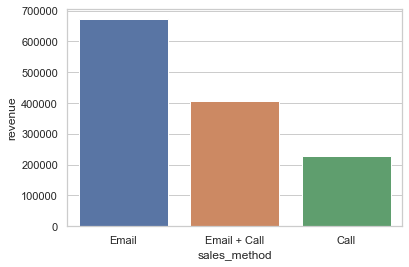

In [87]:
#Ploting the revenue per sales method using a bar plot
sns.barplot(data=total_revenue_sales_method, x="sales_method", y="revenue")
plt.show()

We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.

In [52]:
# Grouping the data by 'state' and summing the 'revenue' for each customer
customer_revenue = df_clean.groupby('state')['revenue'].sum().reset_index()

# Sorting the states by their total revenue contribution in descending order
customer_revenue = customer_revenue.sort_values(by='revenue', ascending=False)

# Displaying the top 10 states by revenue contribution
customer_revenue.head(10)

,state,revenue
4,California,160893.20
42,Texas,106294.45
31,New York,83242.74
8,Florida,77651.75
12,Illinois,52649.35
37,Pennsylvania,51595.35
34,Ohio,48010.94
21,Michigan,44424.81
9,Georgia,43426.41
32,North Carolina,38418.15
